In [1]:
pip install pandas

In [2]:
pip install matplotlib

In [3]:
pip install seaborn

First 5 records:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

              

/tmp/ipython-input-1245680657.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna("Unknown", inplace=True)
/tmp/ipython-input-1245680657.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

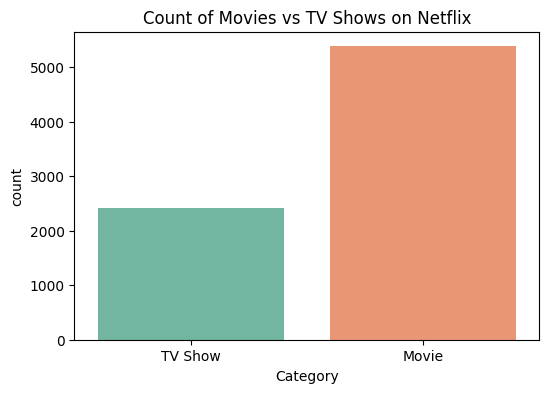

/tmp/ipython-input-1245680657.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


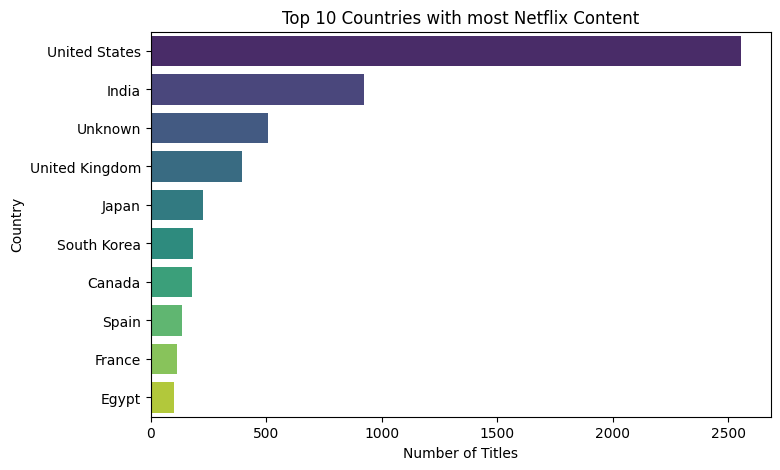

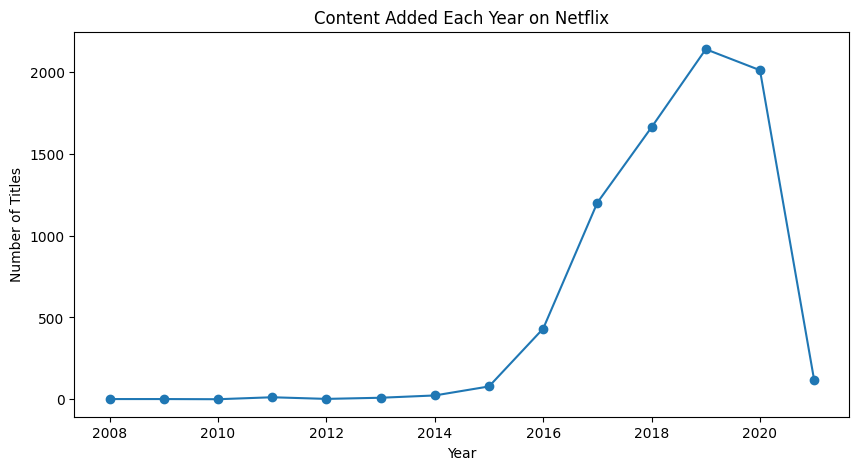

/tmp/ipython-input-1245680657.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Rating", order=df['Rating'].value_counts().index, palette="coolwarm")


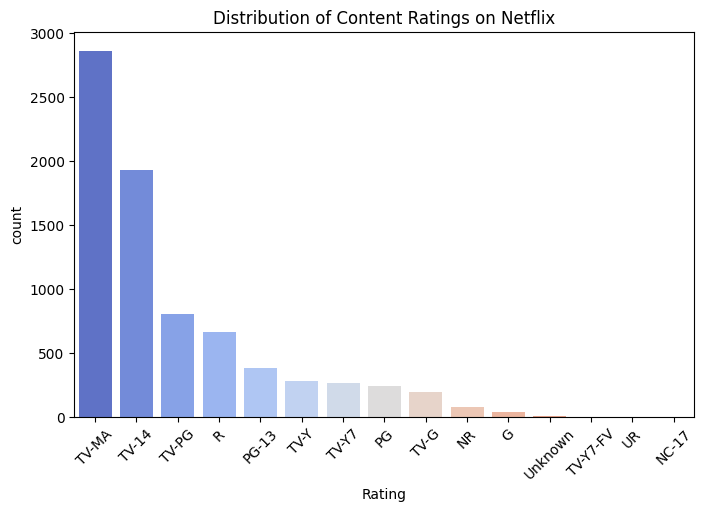

/tmp/ipython-input-1245680657.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")


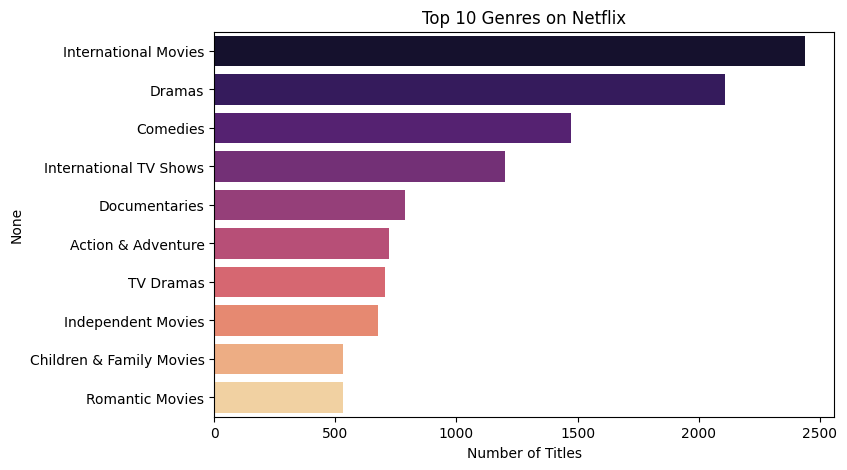


--- Insights ---
Total Movies: 5379
Total TV Shows: 2410
Country with most content: United States
Most popular rating: TV-MA


In [14]:
# Netflix Data Analysis Project
# Author: ChatGPT

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Download Netflix dataset from Kaggle: "Netflix Movies and TV Shows"
df = pd.read_csv("Netflix Dataset.csv")

# Display first few rows
print("First 5 records:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Fill missing values for analysis
df['Country'].fillna("Unknown", inplace=True)
df['Release_Date'].fillna("Unknown", inplace=True)
df['Rating'].fillna("Unknown", inplace=True)

# Convert date_added column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['Release_Date'].dt.year

# --- Exploratory Data Analysis (EDA) ---

# 1. Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Category", palette="Set2")
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

# 2. Top 10 countries with most content
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with most Netflix Content")
plt.xlabel("Number of Titles")
plt.show()

# 3. Content added each year
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
content_per_year.plot(kind='line', marker='o')
plt.title("Content Added Each Year on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

# 4. Distribution of Ratings
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Rating", order=df['Rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Content Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()

# 5. Top 10 Genres/Listed_in categories
from collections import Counter
genre_list = []
for s in df['Type'].dropna():
    genre_list.extend(s.split(', '))
top_genres = pd.Series(genre_list).value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()

print("\n--- Insights ---")
print(f"Total Movies: {df[df['Category']=='Movie'].shape[0]}")
print(f"Total TV Shows: {df[df['Category']=='TV Show'].shape[0]}")
print(f"Country with most content: {df['Country'].value_counts().idxmax()}")
print(f"Most popular rating: {df['Rating'].value_counts().idxmax()}")